In [7]:
import folium
import main



Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-7267U CPU @ 3.10GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 208 rows, 21 columns and 616 nonzeros
Model fingerprint: 0x4f3313fb
Model has 52 quadratic constraints
Variable types: 6 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e-07, 3e-01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-01, 2e+02]

MIP start from previous solve produced solution with objective 2 (0.05s)
Loaded MIP start from previous solve with objective 2


Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 1: 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+00, best bound 2.000000000000e+00, gap 0.0000%
{0: [(

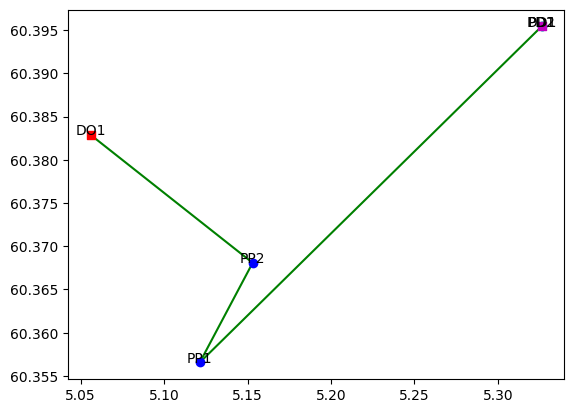

In [8]:
arcs = main.run_only_once()
print("mais")

def get_coordinates():

    result = {}
    for driver in arcs:
        visitation_sequence=[]
        for arc in arcs[driver]:
            if arc[0] not in visitation_sequence:
                visitation_sequence.append(arc[0])
            if arc[1] not in visitation_sequence:
                visitation_sequence.append(arc[1])

        driver_origin = []
        driver_destination = []
        passenger_pickup = []
        passenger_delivery = []

        for node in visitation_sequence:
            if node in main.D:
                for d in main.drivers_json:
                    if main.drivers_json[d]['id'] == node:
                        driver_origin.append(
                            (main.drivers_json[d]['origin_yc'], main.drivers_json[d]['origin_xc']))
                        driver_destination.append(
                            (main.drivers_json[d]['destination_yc'], main.drivers_json[d]['destination_xc']))

            if node in main.NP:
                for p in main.passengers_json:
                    if main.passengers_json[p]['id'] == node:
                        passenger_pickup.append(
                            (main.passengers_json[p]['origin_yc'], main.passengers_json[p]['origin_xc']))

            if node in main.ND:
                for p in main.passengers_json:
                    if main.passengers_json[p]['id'] == node:
                        passenger_delivery.append(
                            (main.passengers_json[p]['destination_yc'], main.passengers_json[p]['destination_xc']))
        result[driver] = driver_origin + passenger_pickup + passenger_delivery + driver_destination

    return result


print(get_coordinates())

m = folium.Map(location=[60.355, 5.21], zoom_start=12)

for driver in main.D:
    folium.PolyLine(get_coordinates()[driver]).add_to(m)

m